<a href="https://colab.research.google.com/github/s4226/ML-python/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mnist 手寫數字辨識資料集
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print('train data', len(x_train))
print('test data', len(x_test))

train data 60000
test data 10000


In [ ]:
# 每張相素為28*28
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)

x_train: (60000, 28, 28)
y_train: (60000,)


In [ ]:
import matplotlib.pyplot as plt
def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image, cmap='binary')
  plt.show()

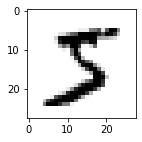

In [ ]:
plot_image(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
# reshape 重新改變維度 astype 改變資料類型
x_train= x_train.reshape(60000,784).astype('float32')
x_test= x_test.reshape(10000,784).astype('float32')

In [ ]:
print(x_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [ ]:
x_train= x_train/255
x_test= x_test/255

In [ ]:
# 分類
from keras.utils import np_utils


In [ ]:
# y值轉成 one-hot encoding
y_train= np_utils.to_categorical(y_train)

In [ ]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
from keras.models import  Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=256, input_dim=784, activation='relu'))
# 使用 softmax activation function ，將結果分成10類
model.add(Dense(units=10, activation='softmax'))
print(model.summary())
# 200960 = 784*256+256
# 2570 = 256*10+10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 分類問題 -> cross entropy  optimizer -> adam演算法 
# 抽出20%資料做驗證資料 8:2
# accuracy -> training 正確率 val_accuracy -> 驗證資料 正確率
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history= model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=12, batch_size=128, verbose=2, validation_data=(x_test, y_test))

Epoch 1/12
375/375 - 2s - loss: 0.3380 - accuracy: 0.9062 - val_loss: 0.1726 - val_accuracy: 0.9523
Epoch 2/12
375/375 - 1s - loss: 0.1473 - accuracy: 0.9581 - val_loss: 0.1301 - val_accuracy: 0.9608
Epoch 3/12
375/375 - 1s - loss: 0.1015 - accuracy: 0.9711 - val_loss: 0.1091 - val_accuracy: 0.9684
Epoch 4/12
375/375 - 1s - loss: 0.0781 - accuracy: 0.9772 - val_loss: 0.0992 - val_accuracy: 0.9705
Epoch 5/12
375/375 - 1s - loss: 0.0590 - accuracy: 0.9826 - val_loss: 0.0853 - val_accuracy: 0.9732
Epoch 6/12
375/375 - 1s - loss: 0.0469 - accuracy: 0.9869 - val_loss: 0.0830 - val_accuracy: 0.9742
Epoch 7/12
375/375 - 1s - loss: 0.0379 - accuracy: 0.9897 - val_loss: 0.0802 - val_accuracy: 0.9757
Epoch 8/12
375/375 - 2s - loss: 0.0296 - accuracy: 0.9926 - val_loss: 0.0778 - val_accuracy: 0.9768
Epoch 9/12
375/375 - 2s - loss: 0.0232 - accuracy: 0.9943 - val_loss: 0.0795 - val_accuracy: 0.9760
Epoch 10/12
375/375 - 2s - loss: 0.0193 - accuracy: 0.9955 - val_loss: 0.0783 - val_accuracy: 0.9768

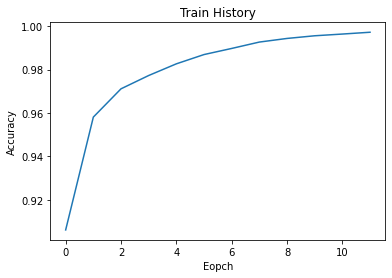

In [ ]:
plt.plot(train_history.history['accuracy'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Eopch')
plt.show()

In [ ]:
print(train_history.history)

{'loss': [0.3379899263381958, 0.14734907448291779, 0.10153334587812424, 0.07808341830968857, 0.059013061225414276, 0.04693113639950752, 0.03790481016039848, 0.029574470594525337, 0.02320883981883526, 0.01929020695388317, 0.01575482450425625, 0.013262897729873657], 'accuracy': [0.906166672706604, 0.9581041932106018, 0.9711250066757202, 0.9772499799728394, 0.9826250076293945, 0.9868958592414856, 0.9897083044052124, 0.9926458597183228, 0.9943125247955322, 0.9955416917800903, 0.9963333606719971, 0.9971666932106018], 'val_loss': [0.17257162928581238, 0.13014408946037292, 0.10912326723337173, 0.09922927618026733, 0.08530756086111069, 0.08299147337675095, 0.08022104203701019, 0.07775664329528809, 0.07950140535831451, 0.07832260429859161, 0.07750044018030167, 0.07513774186372757], 'val_accuracy': [0.9523333311080933, 0.9608333110809326, 0.968416690826416, 0.9704999923706055, 0.9732499718666077, 0.9741666913032532, 0.9756666421890259, 0.9768333435058594, 0.9760000109672546, 0.9768333435058594, 

In [ ]:
# predict_class -> 預測類別
prediction = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
# 混淆矩陣 Confusion matrix
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,0,0,1,1,2,1,2,1
1,0,1130,2,0,0,1,1,1,0,0
2,3,1,1011,0,2,0,2,7,5,1
3,0,0,4,988,0,3,0,5,4,6
4,1,2,2,1,964,1,1,2,1,7
5,2,0,0,5,1,870,4,2,3,5
6,6,3,1,1,5,6,932,0,4,0
7,1,7,8,1,0,0,0,1003,2,6
8,1,0,5,3,0,4,1,5,950,5


In [ ]:
y_test = np_utils.to_categorical(y_test)
loss, accuracy = model.evaluate(x_test, y_test,verbose=2)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 - 0s - loss: 0.0698 - accuracy: 0.9802
Test loss: 0.06978723406791687
Test accuracy: 0.9801999926567078
